In [444]:
import sympy as sp
import numpy as np
import math
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt

# EDO

### Metodo de Taylor y minimos cuadrados

Dado el problema de valor inicial
$$y'=\frac{2}{t}y+t^2e^t,\, 1\leq t\leq2,\, y(1)=0,$$
con solución exacta $y(t)=t^2(e^t-e)$:



1.   Encuentre $n$ para el método de Taylor tal que el error absoluto sea del orden de $10^{-6}$. Use $h=0.1$
2.   Use los valores generados en el inciso anterior para el $n$ encontrado y una aproximación de la forma $be^{ax}$ por mínimos cuadrados para aproximar $y$ en los siguientes valores, compare con los valores reales de $y$.

  *   $y(1.04)$
  *   $y(1.55)$
  *   $y(1.97)$

In [445]:
def derivadas(equation, variable, orden):
    derivada = [equation]  # Inicializa la lista de derivada con la ecuación original

    for _ in range(1, orden):  # Itera desde 1 hasta el número de derivada deseado - 1
        derivative = sp.diff(derivada[-1], variable)  # Calcula la derivada de la última ecuación en la lista
        derivative_subs = derivative.subs(sp.diff(y, variable), equation)  # Sustituye la derivada de y en la ecuación calculada
        derivada.append(derivative_subs)  # Añade la derivada sustituida a la lista de derivada
        
    return derivada 


def taylor_method(derivadas, wi, t0, h, n, orden):
    # Convertimos las funciones de las derivadas en funciones lambda que podemos evaluar
    derivative_funcs = [sp.lambdify((t, y), d) for d in derivadas]

    # Inicializamos una lista vacía para almacenar los valores de y en cada iteración
    wi_values = list()

    # Realizamos n iteraciones
    for _ in range(n):
        # Inicializamos el incremento en y para esta iteración
        wi_increment = 0
        # Calculamos cada término de la serie de Taylor y los sumamos para obtener el incremento en y
        for i in range(orden):
            wi_increment += h**(i+1) / sp.factorial(i+1) * derivative_funcs[i](t0, wi)
        # Actualizamos el valor de y y t para la siguiente iteración
        wi += wi_increment
        t0 += h
        
        wi_values.append(wi)
        
    return wi_values

### punto 1

In [446]:
t = sp.Symbol('t')
y = sp.Function('y')(t)

w0 = 0  
t0 = 1  
h = 0.1  
tf = 2
n = int((tf - t0) / h) 

dydt = (2/t) * y + t**2 * sp.exp(t)  
orden = 5

derivatives_list = derivadas(dydt, t, orden)

approximate_wi = taylor_method(derivatives_list, w0, t0, h, n, orden)

print("valores teoricos")
for i in approximate_wi:
    print(i)

valores teoricos
0.345919711073756
0.866642149992725
1.60721441002734
2.62035853075637
3.96766484293587
5.72095955566921
7.96387089122865
10.7936213478892
14.3230773756282
18.6830919386253


In [447]:
def y_exact(t):
    return t**2 * (math.exp(t) - math.exp(1))

t_values = np.linspace(t0,tf,n+1)[1:]

y_exact_values = [y_exact(t) for t in t_values]

print("valores reales")
for i in y_exact_values:
    print(i)

valores reales
0.3459198765397399
0.866642535759603
1.607215078180737
2.6203595512358335
3.9676662942277936
5.72096152559634
7.963873477844971
10.793624660490641
14.323081535891006
18.683097081886423


### punto 2
### minimos cuadrados

In [448]:
t_array = np.array(t_values)
y_array = np.array(approximate_wi, dtype=float)

# Aplicamos logaritmo natural a los valores de y
y_log = np.log(y_array)

# Construimos la matriz A y el vector b para el sistema lineal Ax = b
A = np.zeros((len(t_array), 2))
A[:, 0] = t_array
A[:, 1] = 1

print("vector A")
print(A)

b_vector = y_log

print("vector b")
print(b_vector)

vector A
[[1.1 1. ]
 [1.2 1. ]
 [1.3 1. ]
 [1.4 1. ]
 [1.5 1. ]
 [1.6 1. ]
 [1.7 1. ]
 [1.8 1. ]
 [1.9 1. ]
 [2.  1. ]]
vector b
[-1.06154858 -0.14312913  0.4745025   0.96331115  1.37817772  1.74413655
  2.07491517  2.37895534  2.66187204  2.92761894]


In [449]:
# resolvemos el sistema de ecuaciones
x = np.linalg.inv(A.T@A)@A.T@b_vector

print("constantes hallados:")
print("a")
a = x[0]
print(a)

print("ln_b")
ln_b = x[1]
print(ln_b)

constantes hallados:
a
4.1673061206539765
ln_b
-5.119443316547542


In [450]:
# Obtenemos b a partir de ln_b
b = np.exp(ln_b)

# Definimos la función aproximada
def y_approx(t):
    return b * np.exp(a * t)

# Evaluamos y_approx en los puntos solicitados
t_values_to_evaluate = [1.04, 1.55, 1.97]
y_approx_values = [y_approx(t) for t in t_values_to_evaluate]
y_exact_values_to_evaluate = [y_exact(t) for t in t_values_to_evaluate]

print("Valores aproximados:")
for i, val in enumerate(y_approx_values):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nValores exactos:")
for i, val in enumerate(y_exact_values_to_evaluate):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nErrores absolutos:")
for i in range(len(y_approx_values)):
    error = abs(y_approx_values[i] - y_exact_values_to_evaluate[i])
    print(f"Error en t = {t_values_to_evaluate[i]}: {error}")

Valores aproximados:
y(1.04) = 0.4559167959823892
y(1.55) = 3.818589717168984
y(1.97) = 21.980369094892595

Valores exactos:
y(1.04) = 0.11998749706134393
y(1.55) = 4.788635020801403
y(1.97) = 17.279298435557664

Errores absolutos:
Error en t = 1.04: 0.3359292989210453
Error en t = 1.55: 0.9700453036324186
Error en t = 1.97: 4.701070659334931


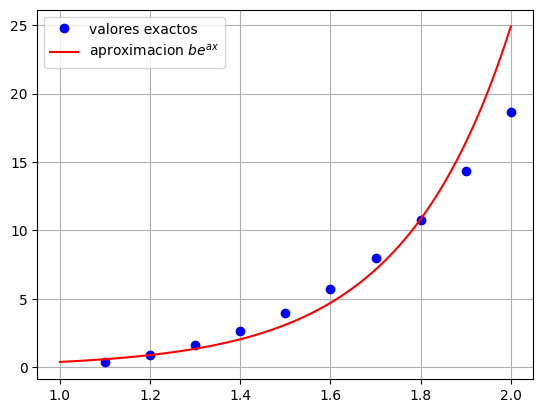

In [451]:
plt.plot(t_values, y_exact_values, 'bo', label = "valores exactos")
t_points = np.linspace(1,2,200)
y = [y_approx(t) for t in t_points]
plt.plot(t_points, y, color='r', label = "aproximacion $be^{ax}$",)
plt.grid(True)
plt.legend()
plt.show()

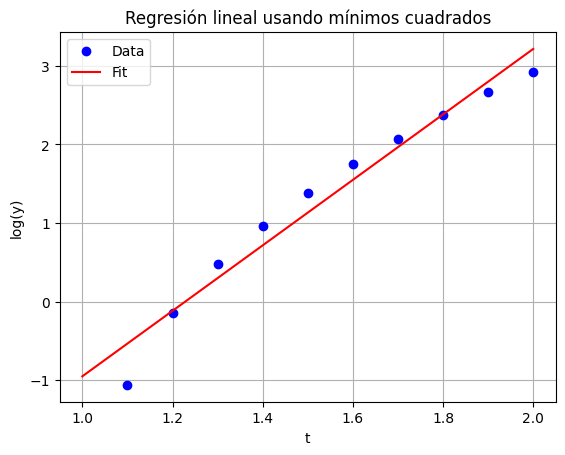

In [452]:
# Evaluar la función lineal en el rango de t
linear_range = [ln_b + a * t for t in t_points]

# Crear el gráfico
plt.plot(t_array, y_log, 'bo', label='Data')  # Puntos de datos originales
plt.plot(t_points, linear_range, color='red', label='Fit')  # Linea de regresión
plt.title('Regresión lineal usando mínimos cuadrados')
plt.xlabel('t')
plt.ylabel('log(y)')
plt.legend()
plt.grid(True)
plt.show()

### Metodo de Euler

Un proyectil de masa $m = 0.11 kg$ disparado verticalmente hacia arriba con una velocidad inicial $v(0) = 8 m/s$ se frena debido a la fuerza de la gravedad, $F_g = −mg$, y debido a la resistencia del aire, $F_r = −kv|v|$ , donde $g = 9.8 m/s^2$ y $k = 0.002 kg/m$. La ecuación diferencial para la velocidad $v$ viene dada por
$$mv'=-mg-kv|v|$$



1.   Encuentre la velocidad después de $0.1,\, 0.2,\, ...,\,1.0\,s$.
2.   Al décimo de segundo más cercano, determine cuándo el proyectil alcanza su altura máxima y
comienza a caer.



In [453]:
def dydt(t, v):
    m = 0.11  # kg
    g = 9.8  # m/s^2
    k = 0.002  # kg/m
    return -g - k*v*abs(v)/m

def euler_method(funcion, t0, v0, h, n):
    # Calculamos las velocidades en los tiempos especificados usando el método de Euler
    velocidades = [v0]

    for _ in range(n):
        y_increment = h * funcion(t0, v0)
        v0 += y_increment
        t0 += h
        velocidades.append(v0)
        
    return velocidades

v0 = 8.0  # velocidad inicial (m/s)
h = 0.1  # pasos
t0 = 0  # tiempo inicial
tf = 1  # tiempo final
n = int((tf - t0) / h) 

# Llamamos al método de Euler
velocidades = euler_method(dydt, t0, v0, h, n)

# Imprimimos las velocidades en los tiempos especificados
for i, v in enumerate(velocidades):
    print(f"tiempo: {h*i:.1f} s, velocidad: {v:.5f} m/s")

# Determinamos cuándo el proyectil alcanza su altura máxima y comienza a caer
for i in range(len(velocidades)):
    if velocidades[i] < 0:
        altura_maxima = h * (i - 1)
        break

print(f"El proyectil alcanza su altura máxima y comienza a caer a los {altura_maxima} s")

tiempo: 0.0 s, velocidad: 8.00000 m/s
tiempo: 0.1 s, velocidad: 6.90364 m/s
tiempo: 0.2 s, velocidad: 5.83698 m/s
tiempo: 0.3 s, velocidad: 4.79504 m/s
tiempo: 0.4 s, velocidad: 3.77323 m/s
tiempo: 0.5 s, velocidad: 2.76735 m/s
tiempo: 0.6 s, velocidad: 1.77342 m/s
tiempo: 0.7 s, velocidad: 0.78770 m/s
tiempo: 0.8 s, velocidad: -0.19343 m/s
tiempo: 0.9 s, velocidad: -1.17336 m/s
tiempo: 1.0 s, velocidad: -2.15085 m/s
El proyectil alcanza su altura máxima y comienza a caer a los 0.7000000000000001 s


### Runge Kutta

Runge-Kutta de orden 2:
 [ 0.34094443  0.85490961  1.58670777  2.58880769  3.92252505  5.65938696
  7.88269471 10.68931241 14.19171264 18.52031456]
Runge-Kutta de orden 4:
 [ 0.34591029  0.86662169  1.60718135  2.62031131  3.9676019   5.72087932
  7.96377179 10.79350178 14.32293573 18.68292657]
los valores exactos son: 
[ 0.34591988  0.86664254  1.60721508  2.62035955  3.96766629  5.72096153
  7.96387348 10.79362466 14.32308154 18.68309708]
los errores son:
 orden2: 
[0.00497544 0.01173293 0.0205073  0.03155186 0.04514124 0.06157457
 0.08117877 0.10431225 0.1313689  0.16278252]
 orden4:
[9.58923330e-06 2.08430307e-05 3.37305167e-05 4.82453640e-05
 6.43962398e-05 8.22013519e-05 1.01685240e-04 1.22876842e-04
 1.45808302e-04 1.70514234e-04]


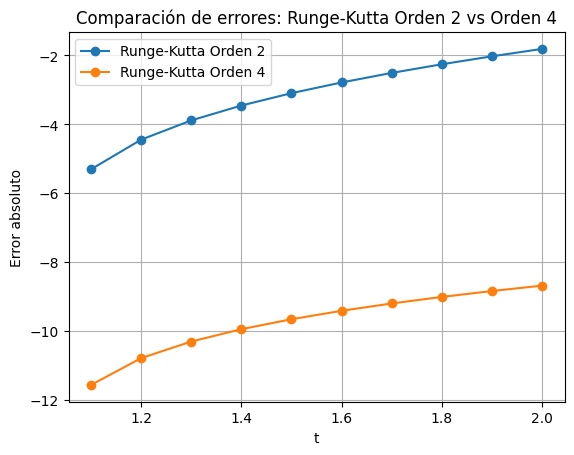

In [454]:
def runge_kutta_2(f, a, b, h, w0):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _  in range(n):
        k1 = f(t, w[-1])
        k2 = f(t + h / 2, w[-1] + h * k1 / 2)
        w_next = w[-1] + h * k2
        w.append(w_next)
        t += h
    return np.array(w)

def runge_kutta_4(f, a, b, h, w0):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _ in range(n):
        k1 = f(t, w[-1])
        k2 = f(t + h / 2, w[-1] + h * k1 / 2)
        k3 = f(t + h / 2, w[-1] + h * k2 / 2)
        k4 = f(t + h, w[-1] + h * k3)
        w_next = w[-1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w.append(w_next)
        t += h
    return np.array(w)

f = lambda t, y: 2 / t * y + t ** 2 * np.exp(t)
a = 1
b = 2
h = 0.1
w0 = 0

w_rk2 = runge_kutta_2(f, a, b, h, w0)[1:]
w_rk4 = runge_kutta_4(f, a, b, h, w0)[1:]

print("Runge-Kutta de orden 2:\n", w_rk2)
print("Runge-Kutta de orden 4:\n", w_rk4)

def exact_solution(t):
    return t ** 2 * (np.exp(t) - np.exp(1))

t_values = np.arange(a, b + h, h)
exact_values = exact_solution(t_values)[1:]

print(f"los valores exactos son: \n{exact_values}")

error_rk2 = np.abs(w_rk2 - exact_values)
error_rk4 = np.abs(w_rk4 - exact_values)

print(f"los errores son:\n orden2: \n{error_rk2}\n orden4:\n{error_rk4}")

plt.plot(t_values[1:], np.log(error_rk2), label="Runge-Kutta Orden 2", marker='o')
plt.plot(t_values[1:], np.log(error_rk4), label="Runge-Kutta Orden 4", marker='o')
plt.xlabel("t")
plt.ylabel("Error absoluto")
plt.legend()
plt.title("Comparación de errores: Runge-Kutta Orden 2 vs Orden 4")
plt.grid()
plt.show()

La reacción química irreversible en la que dos moléculas de dicromato de potasio sólido ($K_{2}Cr_{2}O_{7}$), dos moléculas de agua ($H_{2}O$) y tres átomos de azufre sólido ($S$) se combinan para producir tres moléculas de el dióxido de azufre gaseoso ($SO_{2}$), cuatro moléculas de hidróxido de potasio sólido ($KOH$) y dos moléculas de óxido de cromo sólido ($Cr_{2}O_{3}$) se puede representar simbólicamente mediante la ecuación estequiométrica:

$$2K_{2}Cr_{2}O_{7}+2H_{2}O+3S ⟶ 4KOH + 2Cr_{2}O_{3} + 3SO_{2}$$

Si $n_{1}$ moleculas de $K_{2}Cr_{2}O_{7}$, $n_{2}$ moléculas de $H_{2}O$, y $n_{3}$ moléculas de $S$ están disponibles originalmente, la siguiente ecuación diferencial describe la cantidad $x(t)$ de $KOH$ en el tiempo $t$:

$$\frac{dx}{dt} = k \left ( n_{1}-\frac{x}{2} \right )^2\left (n_{2}-\frac{x}{2}\right )^2\left (n_{3} - \frac{3x}{4}\right )^3$$
donde $k$ es la velocidad constante de la reacción si $k = 6.22 \times 10^{-19}$, $n_{1}=n_{2}=2\times 10^{3}$, y $n_{3}=3\times 10^{3}$, use el método de Runge-Kutta de orden cuatro para determinar cuántas unidades de hidróxido de potasio hay después de 0.2 $s$.

In [455]:
def runge_kutta_4(f, a, b, h, w0):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _ in range(n):
        k1 = f(t, w[-1])
        k2 = f(t + h / 2, w[-1] + h * k1 / 2)
        k3 = f(t + h / 2, w[-1] + h * k2 / 2)
        k4 = f(t + h, w[-1] + h * k3)
        w_next = w[-1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w.append(w_next)
        t += h
    return np.array(w)


La cantidad de hidróxido de potasio (KOH) después de 0.2s es: 2079.408617307593


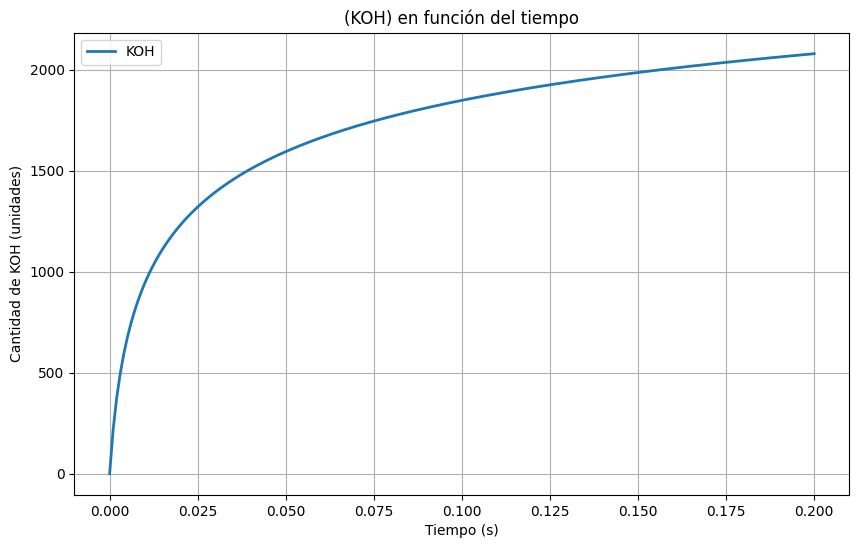

In [456]:
def f(t, x):
    k = 6.22e-19
    n1 = n2 = 2e3
    n3 = 3e3
    return k * (n1 - x / 2)**2 * (n2 - x / 2)**2 * (n3 - 3 * x / 4)**3

x0 = 0
t0 = 0
tf = 0.2
h = 0.001

result = runge_kutta_4(f, t0, tf, h, x0)

print(f"\nLa cantidad de hidróxido de potasio (KOH) después de 0.2s es: {result[-1]}")

t_values = np.arange(t0, tf + h, h)

plt.figure(figsize=(10, 6))
plt.plot(t_values, result, label='KOH', linewidth=2)
plt.title("(KOH) en función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Cantidad de KOH (unidades)")
plt.legend()
plt.grid()
plt.show()